/home/ha/.conda/envs/filament/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in log10
/home/ha/.conda/envs/filament/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log10


KeyboardInterrupt: 

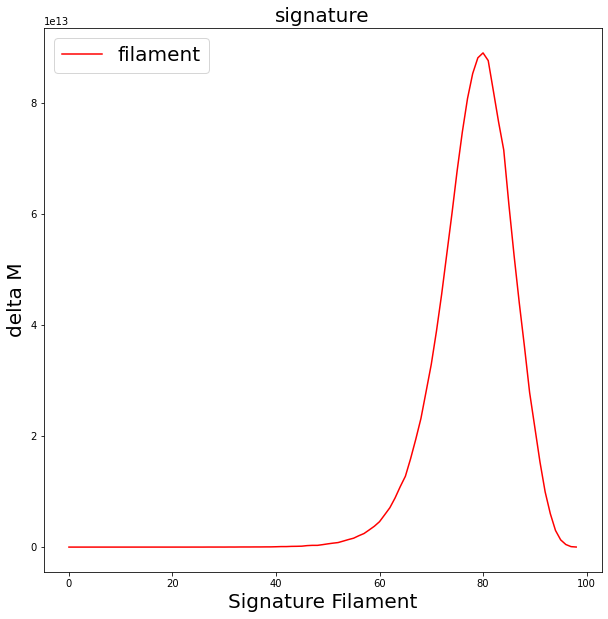

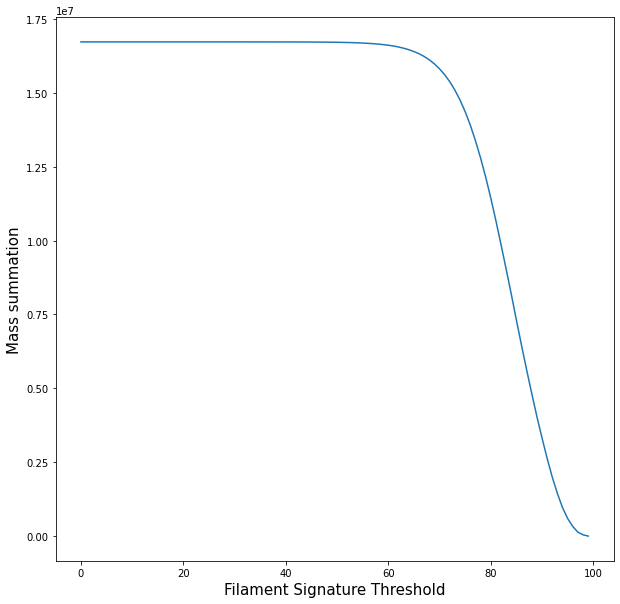

In [5]:
# %load signature_post_process.py
#%%
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import copy 
from numba import jit,njit, float32
import time

#%%
#@jit(float32(float32,float32,float32))
@njit
def mass_threshold_summation(filament,range_filament,dens):
   
    filament_mass_list_tmp = []

    for log_threshold in range_filament:
        mass_sum = 0
        threshold = 10**log_threshold
        for ix in range(filament.shape[0]):
            for iy in range(filament.shape[1]):
                for iz in range(filament.shape[2]):
                    if filament[ix,iy,iz] >= threshold:
                        
                        mass_sum = mass_sum + dens[ix,iy,iz]


        filament_mass_list_tmp.append(mass_sum)
    return filament_mass_list_tmp


#%%

box_num = 1 
box_length = '300Mpc'
        
if box_length == '200Mpc':
    cluster_grid = 200*2 + 1
if box_length == '300Mpc':
    cluster_grid = 135*2 + 1
        
ref_path = '/storage/filament/works_v4/data/' + box_length + '_' + str(box_num) + '/'
cluster_path = ref_path + 'clusters/' 
tmp_path = ref_path + 'signature/pre/'
save_path = ref_path + 'signature/post/'
pic_path = ref_path + 'signature/pic/'

if not os.path.isdir(save_path):
    os.makedirs(save_path)

if not os.path.isdir(pic_path):
    os.makedirs(pic_path)

#%%
for cluster_num in os.listdir(cluster_path):
        
    dens = 10**np.load(cluster_path + cluster_num)
    dens = dens[:cluster_grid-3,:cluster_grid-3,:cluster_grid-3]
    
    filament = np.load(tmp_path + cluster_num)

    filament_max =  np.max(np.log10(filament[np.log10(filament)!=-np.inf]))
    filament_min =  np.min(np.log10(filament[np.log10(filament)!=-np.inf]))

    range_filament = np.linspace(filament_min,filament_max,100)

    filament_mass_list = mass_threshold_summation(filament,range_filament,dens)


    filament_mass_plot = []

    for i in range(len(filament_mass_list)-1):
        filament_mass_plot.append(np.abs ( (filament_mass_list[i]**2 - filament_mass_list[i+1]**2)/(range_filament[i] - range_filament[i+1] )))



    plt.figure(figsize=[10,10])
    plt.plot(filament_mass_plot,'r')
    plt.legend(["filament"],fontsize=20)
    plt.title("signature", fontsize=20)
    plt.ylabel('delta M',fontsize=20)
    plt.xlabel('Signature Filament',fontsize=20)
    plt.savefig(pic_path + str(cluster_num[:-4]) + '_signature.png')

    plt.figure(figsize=[10,10])
    plt.plot(filament_mass_list)
    plt.ylabel('Mass summation',fontsize = 15)
    plt.xlabel('Filament Signature Threshold',fontsize=15)
    plt.savefig(pic_path + str(cluster_num[:-4]) + '_mass_summation.png')

    filament_threshold_index = np.argmax(filament_mass_plot)
    filament_threshold = 10**range_filament[filament_threshold_index]

    filament_tmp = np.array(copy.deepcopy(filament))
    filament_tmp[int(cluster_grid/2) - int(cluster_grid/13) : int(cluster_grid/2) + int(cluster_grid/13) \
            ,int(cluster_grid/2) - int(cluster_grid/13) : int(cluster_grid/2) + int(cluster_grid/13) \
            ,int(cluster_grid/2) - int(cluster_grid/13) : int(cluster_grid/2) + int(cluster_grid/13)] = 0 


    filament_refined = np.zeros([filament_tmp.shape[0],filament_tmp.shape[0],filament_tmp.shape[0]])

    for i in range(filament_tmp.shape[0]):
        for j in range(filament_tmp.shape[0]):
            for k in range(filament_tmp.shape[0]):

                if filament_tmp[i,j,k] >= filament_threshold:
                    filament_refined[i,j,k] = filament_tmp[i,j,k]
                
    np.save(save_path + str(cluster_num[:-4]),filament_refined)
    break

#%%
# wall = np.load(tmp_path + 'wall_gpu_new.npy')


# wall_max =  np.max(np.log10(wall[np.log10(wall)!=-np.inf]))
# wall_min =  np.min(np.log10(wall[np.log10(wall)!=-np.inf]))

# range_wall = np.linspace(wall_min,wall_max,100)

# wall_mass_list = mass_threshold_summation(wall,range_wall,dens)


# wall_mass_plot = []

# for i in range(len(filament_mass_list)-1):
#     wall_mass_plot.append(np.abs ( (wall_mass_list[i]**2 - wall_mass_list[i+1]**2)/(range_wall[i] - range_wall[i+1] )))








In [2]:
save_path

'/storage/filament/works_v4/data/300Mpc_1/signature/pre/'

In [3]:
cluster_num

'1.npy'